In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from time import time
import math

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle

warnings.filterwarnings('ignore')
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
%matplotlib inline

Using TensorFlow backend.


In [0]:
#load the training data
from google.colab import files
uploaded = files.upload()
train_data = pd.read_csv('FCI.csv', header=0)

Saving FCI.csv to FCI (1).csv


In [0]:
train_data.head()

,date,in.credit.commercialbanks.food,in.credit.commercialbanks.nonfood,in.moneysupply.m2,in.exports,in.imports,in.imports.gold,in.fresh.net.fii.inflows,in.fdi.incld.acqs.share,in.mibor.offerrate,in.reer,in.passenger.carsnvans.sales.sa,in.yield.tbill.3m,in.govt.deficit.fiscal,in.govt.deficit.primary,in.iip.2011-12
0,01/01/2016,1027740,69918238.9,25002230,21199.8,28867.5,2912.4,-894,6373,7.08,98.83,201669.3280,7.21,440960,47600,118.9
1,01/02/2016,1060440,70669310.2,25862110,20845.0,27418.1,1405.4,-1251,4514,6.96,95.86,211226.3654,7.28,405910,27400,117.8
2,01/03/2016,1052530,71443619.4,26641050,22912.4,27311.1,973.5,1358,3864,7.38,96.59,207264.2175,7.20,-400890,-1022630,127.6
3,01/04/2016,1040690,71282256.6,27359980,20891.0,25805.4,1238.9,3141,4748,6.60,96.79,210477.5342,6.77,1373260,1214700,113.7
4,01/05/2016,1106610,71157804.6,27214590,22395.3,28287.6,1473.7,-1622,3369,6.54,97.65,207865.2242,6.82,916600,528020,121.3


In [0]:
train_data.shape

(38, 16)

In [0]:
train_data.columns

Index(['date', 'in.credit.commercialbanks.food',
       'in.credit.commercialbanks.nonfood', 'in.moneysupply.m2', 'in.exports',
       'in.imports', 'in.imports.gold', 'in.fresh.net.fii.inflows',
       'in.fdi.incld.acqs.share', 'in.mibor.offerrate', 'in.reer',
       'in.passenger.carsnvans.sales.sa', 'in.yield.tbill.3m',
       'in.govt.deficit.fiscal', 'in.govt.deficit.primary', 'in.iip.2011-12'],
      dtype='object')

In [0]:
#separate our input features and output labels
X = train_data.drop("in.iip.2011-12", axis = 1)
y = train_data['in.iip.2011-12']

In [0]:
#convert the date column into a datetime object
#set the date column as the index of the dataframe
X['date'] = pd.to_datetime(X['date'])

In [0]:
X = X.set_index("date")

In [0]:
#X.drop("date", inplace = True, axis = 1)

In [0]:
X.head()

,in.credit.commercialbanks.food,in.credit.commercialbanks.nonfood,in.moneysupply.m2,in.exports,in.imports,in.imports.gold,in.fresh.net.fii.inflows,in.fdi.incld.acqs.share,in.mibor.offerrate,in.reer,in.passenger.carsnvans.sales.sa,in.yield.tbill.3m,in.govt.deficit.fiscal,in.govt.deficit.primary
date,,,,,,,,,,,,,,
2016-01-01,1027740,69918238.9,25002230,21199.8,28867.5,2912.4,-894,6373,7.08,98.83,201669.3280,7.21,440960,47600
2016-01-02,1060440,70669310.2,25862110,20845.0,27418.1,1405.4,-1251,4514,6.96,95.86,211226.3654,7.28,405910,27400
2016-01-03,1052530,71443619.4,26641050,22912.4,27311.1,973.5,1358,3864,7.38,96.59,207264.2175,7.20,-400890,-1022630
2016-01-04,1040690,71282256.6,27359980,20891.0,25805.4,1238.9,3141,4748,6.60,96.79,210477.5342,6.77,1373260,1214700
2016-01-05,1106610,71157804.6,27214590,22395.3,28287.6,1473.7,-1622,3369,6.54,97.65,207865.2242,6.82,916600,528020


In [0]:
#scale the feature values
scaler = MinMaxScaler(feature_range = (-1, 1))
X_scaled = scaler.fit_transform(X)
X_scaled_data = pd.DataFrame(X_scaled)

In [0]:
X_scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.770299,-1.000000,-0.448675,-0.754691,-0.692506,-0.026999,-0.246551,0.094230,0.577465,-0.153153,-0.874571,0.902778,0.020039,0.066547
1,0.865535,-0.937374,-0.333581,-0.831388,-0.838054,-0.783259,-0.291322,-0.471761,0.408451,-0.747748,-0.517095,1.000000,-0.001226,0.056154
2,0.842498,-0.872811,-0.229321,-0.384479,-0.848799,-1.000000,0.035867,-0.669661,1.000000,-0.601602,-0.665297,0.888889,-0.490702,-0.484054
3,0.808015,-0.886266,-0.133093,-0.821444,-1.000000,-0.866814,0.259468,-0.400518,-0.098592,-0.561562,-0.545105,0.291667,0.585655,0.666984
4,1.000000,-0.896643,-0.152553,-0.496260,-0.750739,-0.748984,-0.337848,-0.820368,-0.183099,-0.389389,-0.642817,0.361111,0.308605,0.313708


In [0]:
X_scaled_data.shape

(38, 14)

In [0]:
X_ = X_scaled_data.copy()

In [0]:
X_scaled_data.columns

RangeIndex(start=0, stop=14, step=1)

In [0]:
X_scaled_data = X_scaled_data.iloc[:30,]

In [0]:
#reshape the input features to ----> [num_samples, time_step, features]
X_train = X_scaled_data.values.reshape(X_scaled_data.shape[0], 1, X_scaled_data.shape[1])

In [0]:
X_scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.770299,-1.000000,-0.448675,-0.754691,-0.692506,-0.026999,-0.246551,0.094230,0.577465,-0.153153,-0.874571,0.902778,0.020039,0.066547
1,0.865535,-0.937374,-0.333581,-0.831388,-0.838054,-0.783259,-0.291322,-0.471761,0.408451,-0.747748,-0.517095,1.000000,-0.001226,0.056154
2,0.842498,-0.872811,-0.229321,-0.384479,-0.848799,-1.000000,0.035867,-0.669661,1.000000,-0.601602,-0.665297,0.888889,-0.490702,-0.484054
3,0.808015,-0.886266,-0.133093,-0.821444,-1.000000,-0.866814,0.259468,-0.400518,-0.098592,-0.561562,-0.545105,0.291667,0.585655,0.666984
4,1.000000,-0.896643,-0.152553,-0.496260,-0.750739,-0.748984,-0.337848,-0.820368,-0.183099,-0.389389,-0.642817,0.361111,0.308605,0.313708
5,0.700635,-0.886806,-0.136929,-0.440272,-0.486828,-0.881819,-0.169426,-0.740600,-0.338028,-0.263263,-0.512237,0.263889,0.343046,0.264561
6,0.809034,-0.865713,-0.157156,-0.650562,-0.645831,-0.947157,0.149862,-0.194398,-0.169014,0.035035,-0.088545,-0.027778,0.159990,0.224628
7,0.745981,-0.877268,-0.108932,-0.668828,-0.648774,-0.927134,0.060948,0.025118,-0.183099,-0.059059,0.126258,-0.027778,-0.160530,-0.059087
8,0.266106,-0.651812,0.086383,-0.415780,-0.394221,-0.584483,0.227239,0.130766,-0.211268,-0.049049,0.318930,-0.055556,-0.003792,0.049317
9,0.754398,-0.757891,-0.006251,-0.287765,-0.127507,0.271290,-0.139453,0.430659,-0.535211,0.201201,0.587553,-0.277778,-0.396010,-0.153744


In [0]:
X_train.shape

(30, 1, 14)

In [0]:
y_train = y.iloc[:30,]
y_train.shape

(30,)

In [0]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(input_shape = (1, 14), output_dim = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = "mse", optimizer = "sgd") 
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 1, 50)             13000     
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 33,251
Trainable params: 33,251
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, 
                    epochs = 400, 
                    batch_size = 1, 
                    verbose = 1, 
                    shuffle = False)


Epoch 1/400
30/30 [==============================] - 0s 6ms/step - loss: 12.5336
Epoch 2/400
30/30 [==============================] - 0s 5ms/step - loss: 10.9996
Epoch 3/400
30/30 [==============================] - 0s 5ms/step - loss: 7.0400
Epoch 4/400
30/30 [==============================] - 0s 5ms/step - loss: 7.4946
Epoch 5/400
30/30 [==============================] - 0s 5ms/step - loss: 5.8344
Epoch 6/400
30/30 [==============================] - 0s 4ms/step - loss: 7.4326
Epoch 7/400
30/30 [==============================] - 0s 5ms/step - loss: 3.6072
Epoch 8/400
30/30 [==============================] - 0s 5ms/step - loss: 6.7131
Epoch 9/400
30/30 [==============================] - 0s 4ms/step - loss: 9.2863
Epoch 10/400
30/30 [==============================] - 0s 4ms/step - loss: 4.2445
Epoch 11/400
30/30 [==============================] - 0s 4ms/step - loss: 6.6869
Epoch 12/400
30/30 [==============================] - 0s 4ms/step - loss: 6.3466
Epoch 13/400
30/30 [===============

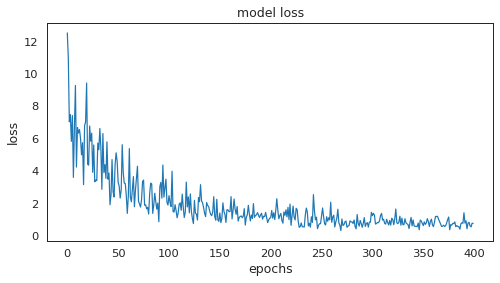

In [0]:
plt.figure(figsize=(8,4))

plt.plot(history.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [0]:
X_scaled_test_data = X_.iloc[-8:,]

In [0]:
X_test = X_scaled_test_data.values.reshape(X_scaled_test_data.shape[0], 1, X_scaled_test_data.shape[1])
#reshape the input features to ----> [num_samples, time_step, features]
#X_train = X_scaled_data.values.reshape(X_scaled_data.shape[0], 1, X_scaled_data.shape[1])

In [0]:
y_test = y.iloc[-8:,]
y_test.values.shape

(8,)

In [0]:
#once the model is being trained, we can proceed to make predictions on our test data
#make predictions on training data
train_predict = model.predict(X_train)

#make predictions on testing data
test_predict = model.predict(X_test)

In [0]:
#predicted values on the test data
test_predict[:,0]

array([135.6674 , 130.19391, 137.13892, 133.54047, 136.84973, 137.1628 ,
       133.64809, 133.38878], dtype=float32)

In [0]:
# invert predictions
#train_predict = scaler.inverse_transform(train_predict)
#Y_train = scaler.inverse_transform([y_train])
#test_predict = scaler.inverse_transform(test_predict)
#Y_test = scaler.inverse_transform([y_test])
print('Train Mean Absolute Error:', mean_absolute_error(y_train.values, train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train.values, train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test.values, test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test.values, test_predict[:,0])))

Train Mean Absolute Error: 0.3568498229980463
Train Root Mean Squared Error: 0.4438051406885702
Test Mean Absolute Error: 5.1992393493652305
Test Root Mean Squared Error: 6.469066003790141


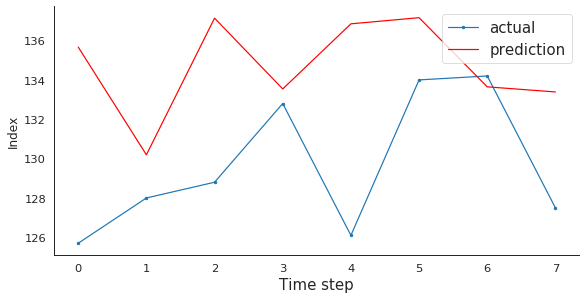

In [0]:
plt.figure(figsize = (8,4))
plt.plot(y_test.values, marker = '.', label = "actual")
plt.plot(test_predict[:,0], 'r', label = "prediction")
plt.tight_layout()
sns.despine(top = True)
plt.subplots_adjust(left = 0.07)
plt.xlabel('Time step', size = 15)
plt.ylabel('Index', size = 12)
plt.legend(fontsize = 15)
plt.show();